---
# Esercitazione 3
---
## Esercizio 3.1 - Plain vanilla option pricing
In questa esercitazione si vuole stimare tramite simulazione **Monte Carlo** il prezzo di un'opzione Europea tipo $\textit{call}$, $C[S(0),0]$, e tipo $\textit{put}$, $P[S(0),0]$, al tempo $t=0$. I parametri utilizzati sono i seguenti:
- prezzo dell'asset al tempo $t=0$: $S(0)=100$
- tempo di scadenza del contratto (delivery date): $T=1$
- prezzo concordato (strike price): $K=100$
- tasso d'interesse, costante e senza rischio (risk-free interest rate): $r=0.1$
- volatilità, costante e indipendente: $\sigma=0.25$

La simulazione viene svolta utilizzando due metodi:
1. Campionamento **diretto** del prezzo finale dell'asset $S(T)$ per una $GBM(r,\sigma^2)$
2. Campionamento a tempi discreti del percorso della $GBM(r,\sigma^2)$ per il prezzo dell'asset, dividendo $[0,T]$ in $10^2$ intervalli: $S(0)$, $S(t_1)$, $S(t_2)$, ... fino a $S(t_{100}=T=1)$

In entrambi i casi vengono svolte $10^5$ simulazioni. I risultati sono analizzati tramite metodo della divisione in blocchi ($N=100$) e confrontati con il valore teorico calcolato analiticamente grazie all'equazione di Black-Scholes. Entrambi questi valori di prezzo call e put sono calcolati qui sotto.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erf
from numpy import exp
from numpy.lib.scimath import log, sqrt

# carico i risultati dei 4 casi
# call e put price con i loro errori nel caso diretto
dir_call, err_dir_call, dir_put, err_dir_put = np.loadtxt("./CALL_PUT_direct.txt", unpack= True, usecols=(0,1,2,3), skiprows=1)
# call e put price con i loro errori nel caso discreto
dis_call, err_dis_call, dis_put, err_dis_put = np.loadtxt("./CALL_PUT_discrete.txt", unpack= True, usecols=(0,1,2,3), skiprows=1)
 
# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    teo_call, teo_put = black_scholes(S0, K, T, r, sigma)

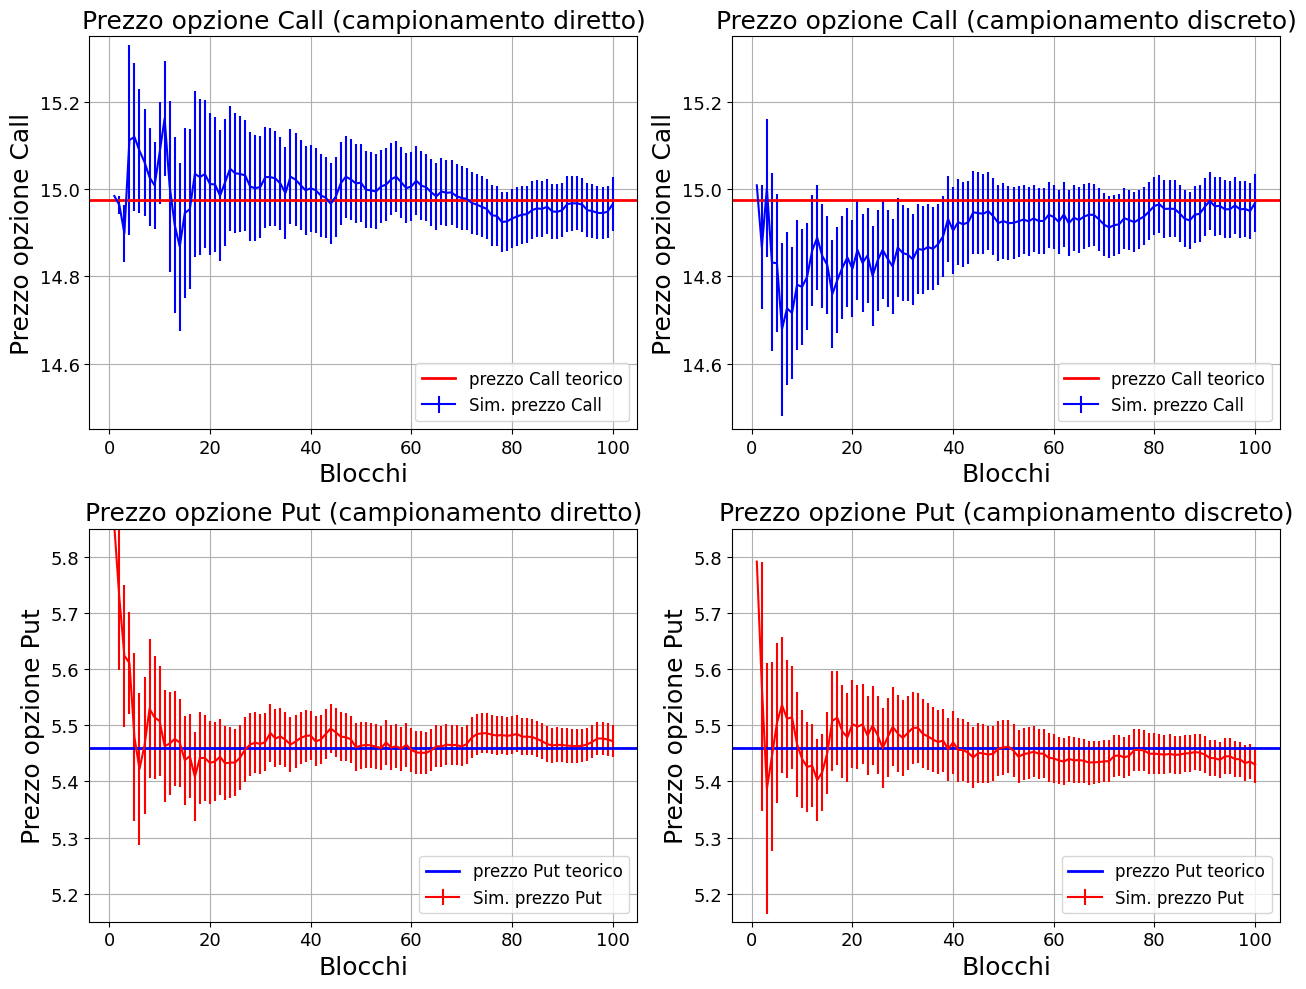

Valor medio prezzo opzione Call (campionamento diretto):  14.965 +\- 0.062
Livello di confidenza con il valore atteso:  0.17 sigma


Valor medio prezzo opzione Call (campionamento discreto):  14.968 +\- 0.066
Livello di confidenza con il valore atteso:  0.11 sigma

 ---------------------
Valor medio prezzo opzione Put (campionamento diretto):  5.472 +\- 0.029
Livello di confidenza con il valore atteso:  0.42 sigma


Valor medio prezzo opzione Put (campionamento discreto):  5.43 +\- 0.032
Livello di confidenza con il valore atteso:  0.93 sigma


In [7]:
N_blocks = len(dir_call) # numero blocchi

# x del grafico, numero di lanci totali incrementando ogni volta il numero di blocchi
x = np.arange(1, N_blocks+1)     # numero blocchi

plt.figure(figsize=(13,10))

##################################
# Grafico prezzo Call caso dicreto
plt.subplot(2,2,1)

plt.title(r"Prezzo opzione Call (campionamento diretto)", fontsize=18)

plt.ylim(14.45, 15.35)
plt.errorbar(x, dir_call, yerr=err_dir_call, label = "Sim. prezzo Call", color = 'blue') #plotto la media cumulativa con errore del prezzo di Call

plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"Prezzo opzione Call", fontsize=18)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.axhline(y=teo_call, xmin=0, xmax=1, label=r'prezzo Call teorico', lw = 2, color = 'red')

plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

######################################
# Plot prezzo Put caso diretto

plt.subplot(2,2,3)

plt.title(r"Prezzo opzione Put (campionamento diretto)", fontsize=18)

plt.ylim(5.15, 5.85)
plt.errorbar(x, dir_put, yerr=err_dir_put, label = "Sim. prezzo Put", color = 'red') #plotto la media cumulativa con errore del prezzo di Call

plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"Prezzo opzione Put", fontsize=18)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.axhline(y=teo_put, xmin=0, xmax=1, label=r'prezzo Put teorico', lw = 2, color = 'blue')

plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

#####################################
# Grafico prezzo Call caso discreto
plt.subplot(2,2,2)

plt.title(r"Prezzo opzione Call (campionamento discreto)", fontsize=18)

plt.ylim(14.45, 15.35)
plt.errorbar(x, dis_call, yerr=err_dis_call, label = "Sim. prezzo Call", color = 'blue') #plotto la media cumulativa con errore del prezzo di Call

plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"Prezzo opzione Call", fontsize=18)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.axhline(y=teo_call, xmin=0, xmax=1, label=r'prezzo Call teorico', lw = 2, color = 'red')

plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

######################################
# Plot prezzo Put caso discreto

plt.subplot(2,2,4)

plt.title(r"Prezzo opzione Put (campionamento discreto)", fontsize=18)

plt.ylim(5.15, 5.85)
plt.errorbar(x, dis_put, yerr=err_dis_put, label = "Sim. prezzo Put", color = 'red') #plotto la media cumulativa con errore del prezzo di Call

plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"Prezzo opzione Put", fontsize=18)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.axhline(y=teo_put, xmin=0, xmax=1, label=r'prezzo Put teorico', lw = 2, color = 'blue')

plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

plt.show()

print("Valor medio prezzo opzione Call (campionamento diretto): ", round(dir_call[-1],3), "+\-", round(err_dir_call[-1],3))
print("Livello di confidenza con il valore atteso: ",np.abs(round((dir_call[-1] - teo_call)/err_dir_call[-1],2)), "sigma")
print("\n")

print("Valor medio prezzo opzione Call (campionamento discreto): ", round(dis_call[-1],3), "+\-", round(err_dis_call[-1],3))
print("Livello di confidenza con il valore atteso: ",np.abs(round((dis_call[-1] - teo_call)/err_dis_call[-1],2)), "sigma")
print("\n ---------------------")

print("Valor medio prezzo opzione Put (campionamento diretto): ", round(dir_put[-1],3), "+\-", round(err_dir_put[-1],4))
print("Livello di confidenza con il valore atteso: ", np.abs(round((dir_put[-1] - teo_put)/err_dir_put[-1],2)), "sigma")
print("\n")

print("Valor medio prezzo opzione Put (campionamento discreto): ", round(dis_put[-1],3), "+\-", round(err_dis_put[-1],4))
print("Livello di confidenza con il valore atteso: ", np.abs(round((dis_put[-1] - teo_put)/err_dis_put[-1],2)), "sigma")